# 📌 CREDIT RISK PREDICTION - DAY 3: Model Building

### 🎯 Goals
- Train baseline models (Logistic Regression, XGBoost)
- Evaluate performance using AUC-ROC, F1-score, Accuracy
- Compare model results and save outputs

In [1]:
# 1. Imports & Load Cleaned Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Load cleaned dataset
df = pd.read_csv('../data/cleaned_credit_data.csv')
print(df.shape)
df.head()


(32581, 13)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0.593220
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.104167
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.572917
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.534351
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.643382


In [6]:
# 2. Prepare Features and Target
target = 'loan_status'
features = [col for col in df.columns if col != target]

X_raw = df[features]
y = df[target]

# Convert categorical features to numeric
X = pd.get_dummies(X_raw, drop_first=True)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (26064, 23)
Test shape: (6517, 23)


In [8]:
# 4. Scale Features (only for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# 5. Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

log_preds = log_model.predict(X_test_scaled)
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]

print("📊 Logistic Regression Classification Report:")
print(classification_report(y_test, log_preds))

log_auc = roc_auc_score(y_test, log_probs)
print(f"Logistic Regression AUC: {log_auc:.4f}")


📊 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5095
           1       0.78      0.58      0.66      1422

    accuracy                           0.87      6517
   macro avg       0.83      0.76      0.79      6517
weighted avg       0.87      0.87      0.86      6517

Logistic Regression AUC: 0.8765


In [10]:
# 6. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

print("📊 XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))

xgb_auc = roc_auc_score(y_test, xgb_probs)
print(f"XGBoost AUC: {xgb_auc:.4f}")


c:\Projects\Credit-Risk-Prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:29:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.96      0.73      0.83      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.90      6517
weighted avg       0.94      0.93      0.93      6517

XGBoost AUC: 0.9509


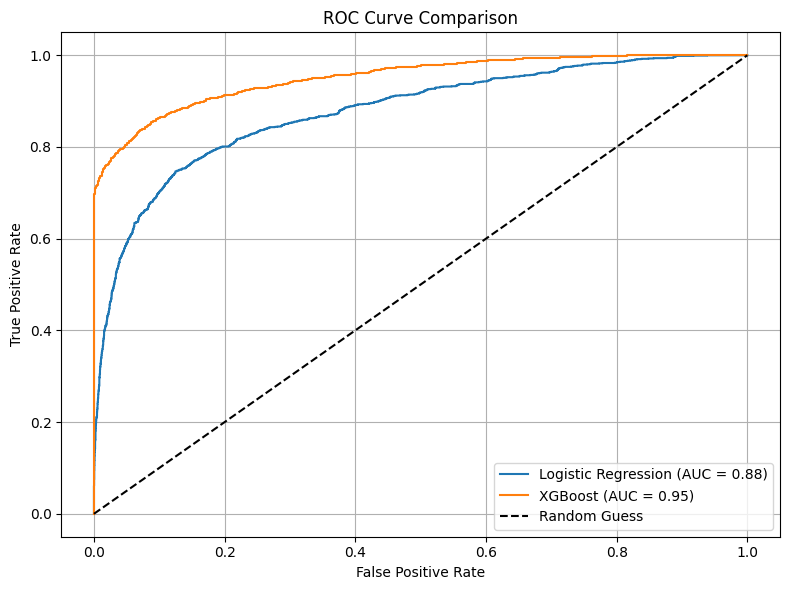

In [11]:
# 7. ROC Curve Comparison
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {log_auc:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../reports/day3_roc_comparison.png')
plt.show()


In [12]:
# 8. Save AUC Scores to CSV
score_df = pd.DataFrame({
    "Model": ["Logistic Regression", "XGBoost"],
    "AUC Score": [log_auc, xgb_auc]
})
score_df.to_csv("../reports/day3_model_auc_scores.csv", index=False)
print("✅ AUC scores saved to reports/day3_model_auc_scores.csv")


✅ AUC scores saved to reports/day3_model_auc_scores.csv
